In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# i need different plots for each planet
# day vs flux

In [8]:
import lightkurve as lk

In [62]:
#searching for light curves
# we want to find the light curve for Kepler 324, so we need to look up what its KIC ID is. We got "11601584" from the mikulski archive.
search_result = lk.search_lightcurve('KIC 11601584', author='Kepler') #(identify the target, author= the specific mission that will be returned.)
search_result

#returns a table with information I can download. The results say that KIC 11601584 was obsevered in quaters 1-17 of kepler. 

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 01,2009,Kepler,1800,kplr011601584,0.0
1,Kepler Quarter 02,2009,Kepler,1800,kplr011601584,0.0
2,Kepler Quarter 03,2009,Kepler,1800,kplr011601584,0.0
3,Kepler Quarter 04,2010,Kepler,1800,kplr011601584,0.0
4,Kepler Quarter 05,2010,Kepler,1800,kplr011601584,0.0
5,Kepler Quarter 06,2010,Kepler,1800,kplr011601584,0.0
6,Kepler Quarter 07,2010,Kepler,1800,kplr011601584,0.0
7,Kepler Quarter 10,2011,Kepler,1800,kplr011601584,0.0
8,Kepler Quarter 09,2011,Kepler,1800,kplr011601584,0.0


C:\Users\winx2\anaconda3\Lib\site-packages\lightkurve\search.py:420: LightkurveWarning: Warning: 17 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


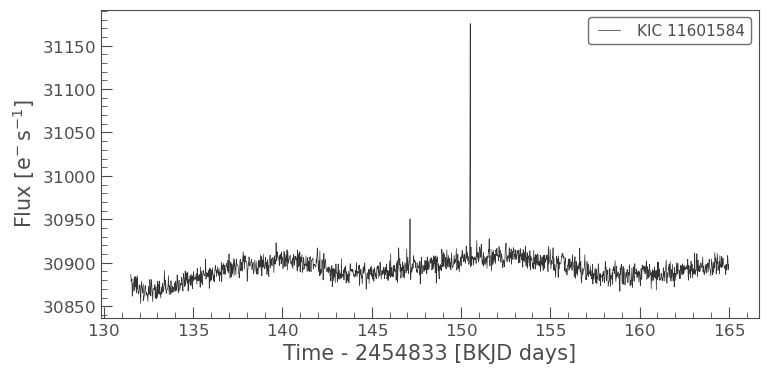

In [27]:
lc = search_result.download()  # grabs the first available lightcurve file

# Plot the first light curve
lc.plot()
plt.show()

In [28]:
#get the info for the lightcurve above
search_result[0] 
#select a single entry by indexing the result. 

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 01,2009,Kepler,1800,kplr011601584,0.0


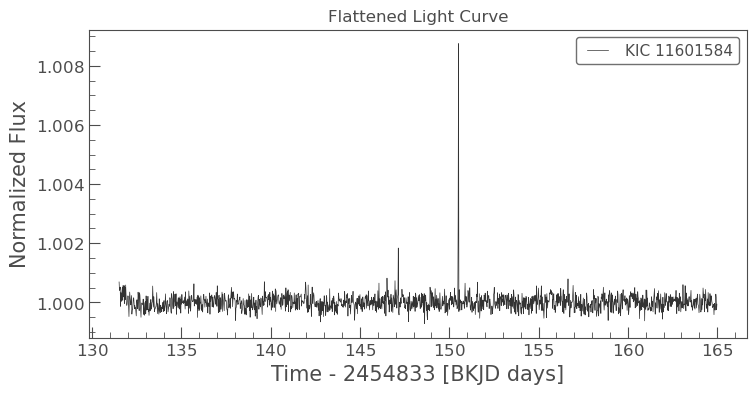

In [29]:
#flatten the quater 1 light curve.
lc_flat = lc.flatten(window_length=401)  # remove long-term trends
lc_flat.plot()
plt.title("Flattened Light Curve")
plt.show()

In [55]:
#identify the transit period using BLS
from astropy.timeseries import BoxLeastSquares

# Extract time and flux arrays from the flattened light curve
time = lc_flat.time.value #time in days
flux = lc_flat.flux.value 

# Remove NaNs
mask = ~np.isnan(flux)
time = time[mask]
flux = flux[mask]

# Box Least Squares search
# BLS looks for periodic “box-shaped” dips in the light curve like transits
bls = BoxLeastSquares(time, flux)
periods = np.linspace(1, 30, 10000)  # search periods 1-30 days

# Run BLS to compute the “power” of transit-like signals for a range of periods
bls_results = bls.autopower(0.02)  #0.02 is the expected transit duration as a fraction of the period

best_period = bls_results.period[np.argmax(bls_results.power)] # Identify the period with the highest BLS power (most likely transit period)
print(f"Best-fit period: {best_period:.5f} days")

Best-fit period: 17.23251 days


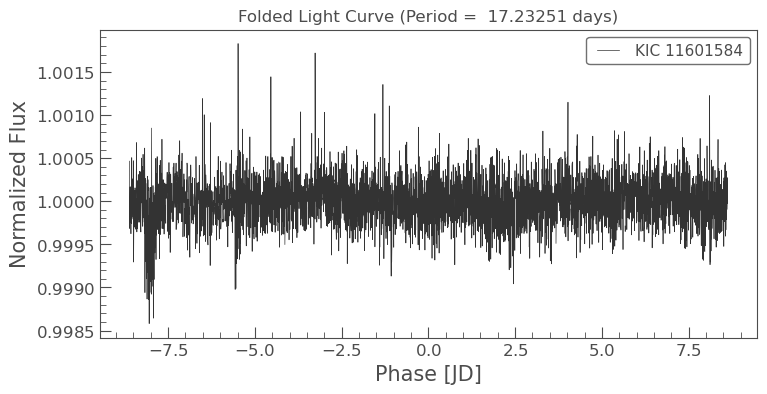

In [56]:
# Fold the light curve. This aligns all the transits on top of each other. 
lc_fold = lc_flat.fold(period=best_period)
lc_fold.plot()
plt.title(f"Folded Light Curve (Period =  17.23251 days)")
plt.show()

In [ ]:
#NEW QUATER (quater 3)

In [34]:
#now specify what data we want. I went with search result 3 for no particular reason. 
search_result_q3 = lk.search_lightcurve("KIC 11601584", mission="Kepler", quarter=3)
search_result_q3[0]

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 03,2009,Kepler,1800,kplr011601584,0.0


In [36]:
#downloading a single light curve
lc = search_result_q3.download()
lc

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
260.2242802400724,———,———,0,2.070520e-03,601.29489,951.48591,7404,2.6540309e+04,5.4932532e+00,8.9441907e+02,4.5316830e-01,———,———,0,———,———,———,———,601.29489,2.8043723e-04,951.48591,2.3015958e-04,-2.3300355e-02,1.5147284e-02
260.2447134529939,3.0680984e+04,6.4022803e+00,0,2.070033e-03,601.29469,951.48502,7405,2.6524207e+04,5.4913187e+00,8.9127795e+02,4.5486757e-01,3.0680984e+04,6.4022803e+00,0,———,———,———,———,601.29469,2.8051989e-04,951.48502,2.3020680e-04,-2.3012146e-02,1.5091835e-02
260.2651465654417,3.0670418e+04,6.4029078e+00,1000000000000000000,2.069545e-03,601.29484,951.48631,7406,2.6525598e+04,5.4917636e+00,8.9203125e+02,4.5281789e-01,3.0670418e+04,6.4029078e+00,1000000000000000000,———,———,———,———,601.29484,2.8051887e-04,951.48631,2.3018355e-04,-2.3035552e-02,1.5343181e-02
260.285579577896,3.0669436e+04,6.4016018e+00,1000010000000000000,2.069058e-03,601.29511,951.48502,7407,2.6520340e+04,5.4911227e+00,8.9374249e+02,4.5297506e-01,3.0669436e+04,6.4016018e+00,1000010000000000000,———,———,———,———,601.29511,2.8062274e-04,951.48502,2.3025998e-04,-2.2957385e-02,1.5145782e-02
260.306012790119,3.0663797e+04,6.4032025e+00,1000000000000000000,2.068570e-03,601.29496,951.48572,7408,2.6523135e+04,5.4921012e+00,8.9407581e+02,4.5373201e-01,3.0663797e+04,6.4032025e+00,1000000000000000000,———,———,———,———,601.29496,2.8051186e-04,951.48572,2.3023158e-04,-2.2812739e-02,1.5551528e-02
260.32644590233394,3.0669607e+04,6.4021997e+00,1000000000000000000,2.068082e-03,601.29492,951.48523,7409,2.6521830e+04,5.4915299e+00,8.9315955e+02,4.5306715e-01,3.0669607e+04,6.4021997e+00,1000000000000000000,———,———,———,———,601.29492,2.8059501e-04,951.48523,2.3024311e-04,-2.3013471e-02,1.5194202e-02
260.3468789143226,3.0682248e+04,6.4039297e+00,1000000000000000000,2.067594e-03,601.29494,951.48601,7410,2.6535617e+04,5.4928513e+00,8.9312872e+02,4.5348558e-01,3.0682248e+04,6.4039297e+00,1000000000000000000,———,———,———,———,601.29494,2.8046704e-04,951.48601,2.3015142e-04,-2.2899039e-02,1.5608768e-02
260.36731202607916,3.0677574e+04,6.4028587e+00,1000000000000000000,2.067106e-03,601.29533,951.48573,7411,2.6527650e+04,5.4918065e+00,8.9370129e+02,4.5292816e-01,3.0677574e+04,6.4028587e+00,1000000000000000000,———,———,———,———,601.29533,2.8052751e-04,951.48573,2.3018163e-04,-2.2880919e-02,1.5511223e-02


In [37]:
#this returned a single object in the table above. It is also an astropy table so I conveverted the time and flux columns to a numpy array to make plotting eaiser. 

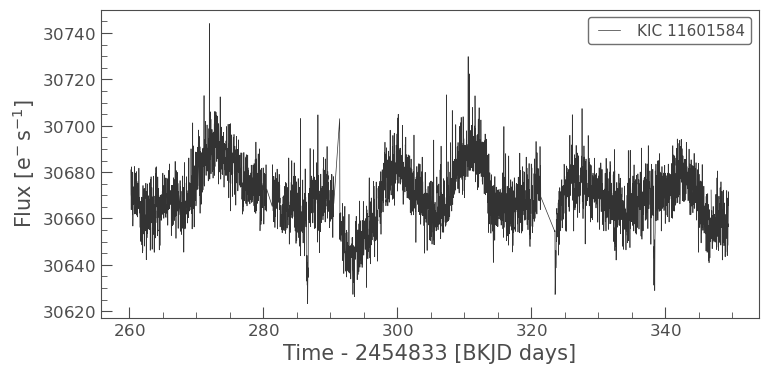

In [38]:
lc.plot()
plt.show() #put plt.show because lc.plot was not working and it was just giving coordinates

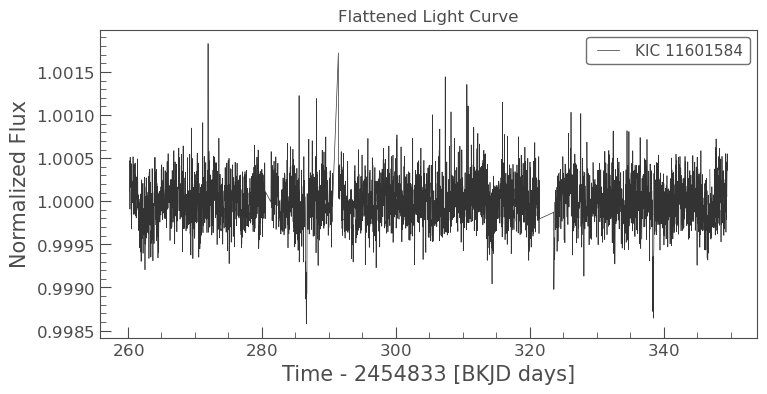

In [59]:
#flatten the quater 3 light curve.
lc_flat = lc.flatten(window_length=401)  # remove long-term trends
lc_flat.plot()
plt.title("Flattened Light Curve")
plt.show()

In [60]:
#identify the transit period using BLS
from astropy.timeseries import BoxLeastSquares

# Extract time and flux arrays from the flattened light curve
time = lc_flat.time.value #time in days
flux = lc_flat.flux.value 

# Remove NaNs
mask = ~np.isnan(flux)
time = time[mask]
flux = flux[mask]

# Box Least Squares search
# BLS looks for periodic “box-shaped” dips in the light curve like transits
bls = BoxLeastSquares(time, flux)
periods = np.linspace(1, 30, 10000)  # search periods 1-30 days

# Run BLS to compute the “power” of transit-like signals for a range of periods
bls_results = bls.autopower(0.02)  #0.02 is the expected transit duration as a fraction of the period

best_period = bls_results.period[np.argmax(bls_results.power)] # Identify the period with the highest BLS power (most likely transit period)
print(f"Best-fit period: {best_period:.5f} days")

Best-fit period: 17.23251 days


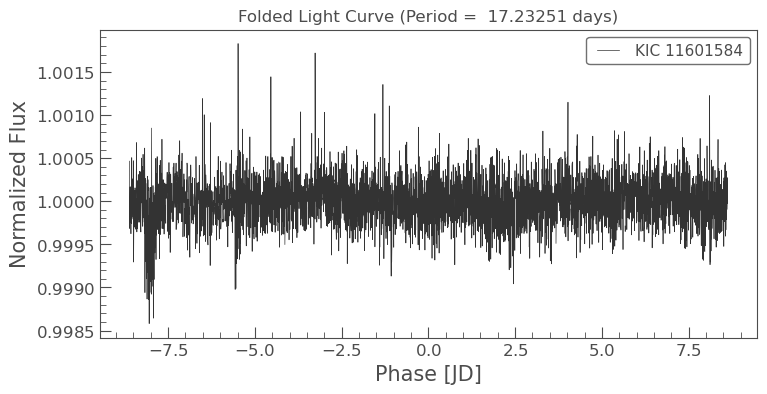

In [58]:
# Fold the light curve.
lc_fold = lc_flat.fold(period=best_period)
lc_fold.plot()
plt.title(f"Folded Light Curve (Period =  17.23251 days)")
plt.show()

In [ ]:
#got the exact same thing. this shows that the quater doesnt matter that much and for the rest of them im just going to use te first quater. 

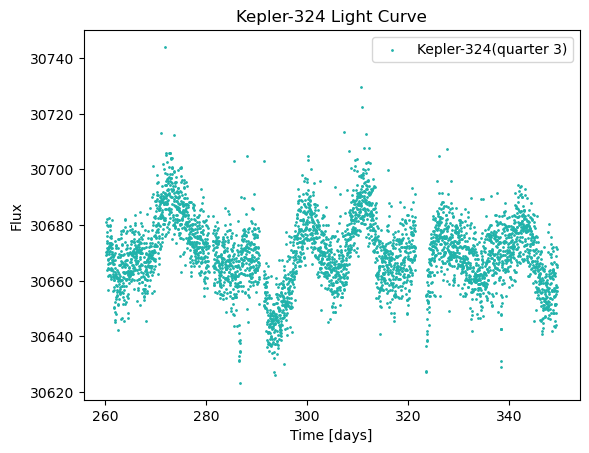

In [13]:
# time = lc['time']       # time in days
# flux = lc['flux']      # flux values

#make a scatter plot

time = lc['time'].value           # strip units by using '.value' and turn them into numpy arrays,and # time in days
flux = lc['flux'].value  


plt.scatter(time, flux, s=1, color='lightseagreen', label='Kepler-324(quarter 3)')
plt.title('Kepler-324 Light Curve')
plt.xlabel('Time [days]')
plt.ylabel('Flux')
plt.legend()
plt.show()


In [ ]:
#new quater: graph using kepler quarter 2

In [15]:
search_result_q2 = lk.search_lightcurve("KIC 11601584", mission="Kepler", quarter=2)
search_result_q2[0]

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 02,2009,Kepler,1800,kplr011601584,0.0


In [16]:
lc = search_result_q2.download()
lc

C:\Users\winx2\anaconda3\Lib\site-packages\lightkurve\search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
169.76498169376282,3.1042389e+04,6.0466747e+00,10000000000000,2.303174e-03,601.70964,955.61921,2977,2.8023332e+04,5.4274487e+00,1.0185803e+03,2.2914113e-01,3.1042389e+04,6.0466747e+00,10000000000000,———,———,———,———,601.70964,2.5445531e-04,955.61921,2.5621537e-04,-6.0412763e-03,1.4842521e-01
169.7854157902766,3.1039578e+04,6.0476537e+00,0,2.303570e-03,601.70970,955.61930,2978,2.8020701e+04,5.4271460e+00,1.0189087e+03,2.2900797e-01,3.1039578e+04,6.0476537e+00,0,———,———,———,———,601.70970,2.5452848e-04,955.61930,2.5626202e-04,-5.9787524e-03,1.4846398e-01
169.80584968655603,3.1051080e+04,6.0474391e+00,0,2.303967e-03,601.70966,955.61996,2979,2.8030676e+04,5.4275732e+00,1.0190865e+03,2.2912046e-01,3.1051080e+04,6.0474391e+00,0,———,———,———,———,601.70966,2.5437225e-04,955.61996,2.5609499e-04,-6.0496079e-03,1.4845814e-01
169.82628378259687,3.1269230e+04,6.1013508e+00,10000000,2.304363e-03,601.71196,955.62777,2980,2.8224867e+04,5.4746189e+00,1.0181607e+03,2.2870500e-01,3.1269230e+04,6.1013508e+00,10000000,———,———,———,———,601.71196,2.5289136e-04,955.62777,2.5623036e-04,-6.3265297e-03,1.4794968e-01
169.84671767841064,3.1033406e+04,6.0467477e+00,10000000,2.304758e-03,601.70906,955.61893,2981,2.8012088e+04,5.4271331e+00,1.0212397e+03,2.2918117e-01,3.1033406e+04,6.0467477e+00,10000000,———,———,———,———,601.70906,2.5455034e-04,955.61893,2.5629345e-04,-6.1818697e-03,1.4793785e-01
169.86715177422593,3.1040051e+04,6.0496178e+00,0,2.305154e-03,601.70874,955.61997,2982,2.8015611e+04,5.4270306e+00,1.0185109e+03,2.2882380e-01,3.1040051e+04,6.0496178e+00,0,———,———,———,———,601.70874,2.5451716e-04,955.61997,2.5627782e-04,-6.2396498e-03,1.4848702e-01
169.8875856697996,3.1033615e+04,6.0449190e+00,0,2.305550e-03,601.70850,955.61917,2983,2.8008232e+04,5.4263959e+00,1.0177446e+03,2.2880444e-01,3.1033615e+04,6.0449190e+00,0,———,———,———,———,601.70850,2.5454082e-04,955.61917,2.5634503e-04,-6.2279990e-03,1.4789818e-01
169.90801966514846,3.1035979e+04,6.0487361e+00,0,2.305945e-03,601.70935,955.61936,2984,2.8008207e+04,5.4264350e+00,1.0181066e+03,2.2860052e-01,3.1035979e+04,6.0487361e+00,0,———,———,———,———,601.70935,2.5455703e-04,955.61936,2.5635058e-04,-6.4100586e-03,1.4794837e-01


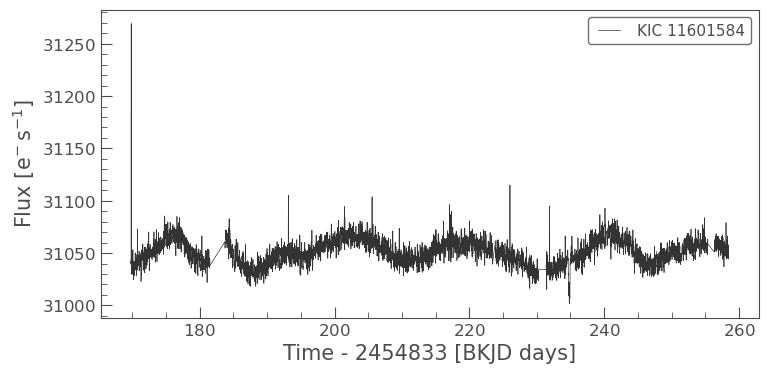

In [17]:
lc.plot()
plt.show()

In [47]:
flat_lc = lc.normalize().flatten(window_length=401)
flat_lc.plot()

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

In [24]:
lc_collection = search_result[:17].download_all()
lc_collection

LightCurveCollection of 17 objects:
    0: <KeplerLightCurve LABEL="KIC 11601584" QUARTER=1 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    1: <KeplerLightCurve LABEL="KIC 11601584" QUARTER=2 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    2: <KeplerLightCurve LABEL="KIC 11601584" QUARTER=3 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    3: <KeplerLightCurve LABEL="KIC 11601584" QUARTER=4 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    4: <KeplerLightCurve LABEL="KIC 11601584" QUARTER=5 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    5: <KeplerLightCurve LABEL="KIC 11601584" QUARTER=6 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    6: <KeplerLightCurve LABEL="KIC 11601584" QUARTER=7 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    7: <KeplerLightCurve LABEL="KIC 11601584" QUARTER=10 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    8: <KeplerLightCurve LABEL="KIC 11601584" QUARTER=9 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    9: <KeplerLightCurve LABEL="KIC 11601584" QUARTER=13 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    10: <Kep

In [20]:
#he tutorial on combining multiple quarters of Kepler observations.

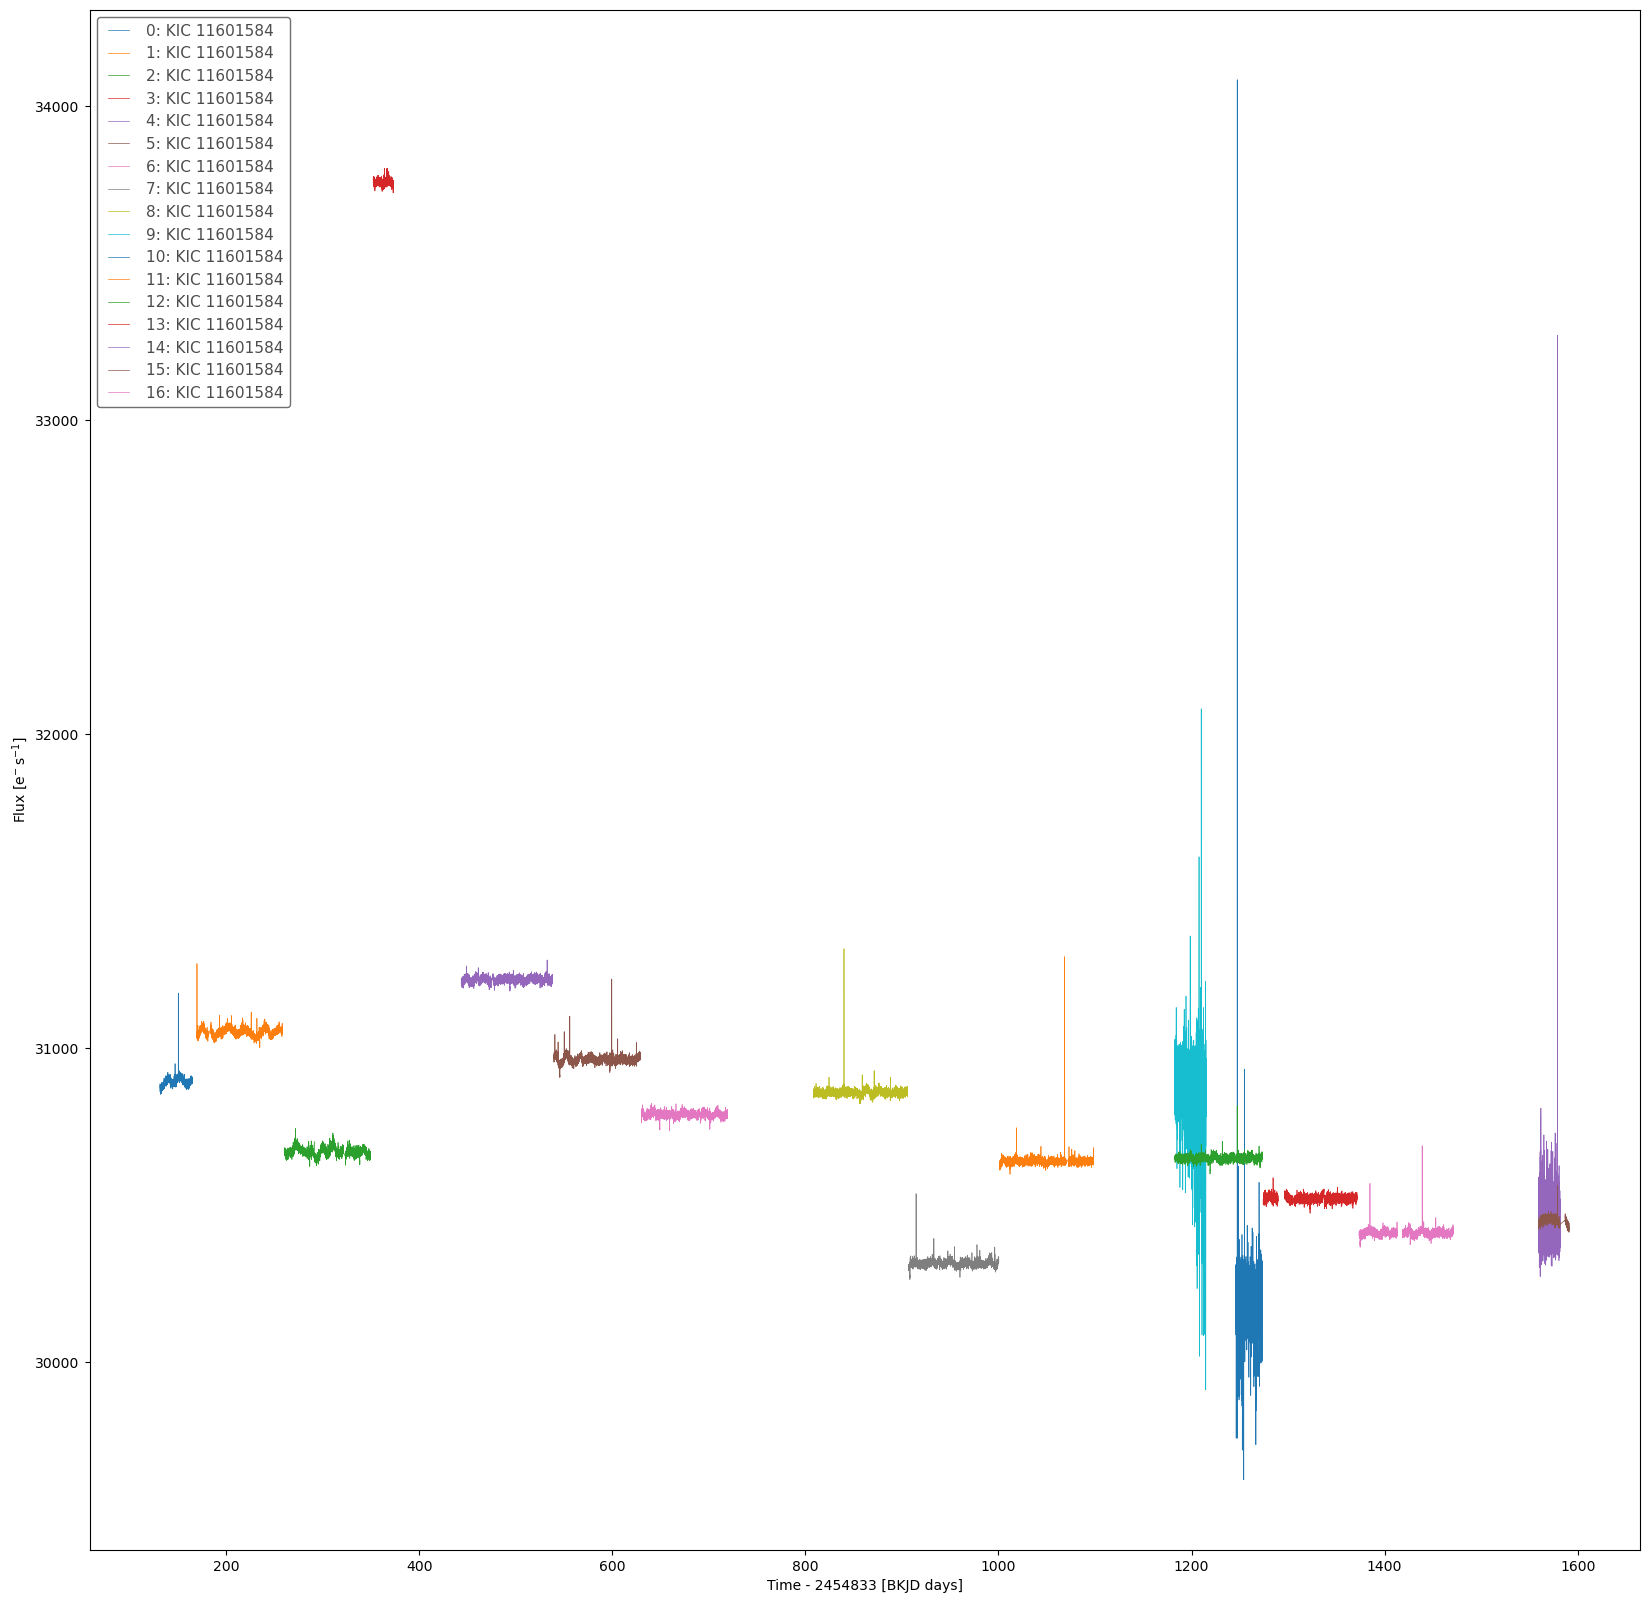

In [27]:
# make a larger figure to be able to see everything
fig, ax = plt.subplots(figsize=(20,20))
# Plot the light curves (quaters 1-5)
lc_collection.plot(ax=ax);
plt.show()
#the quarters are a 3-month segment of observations of the same star
#the transits are the small dips within each quarter. 

In [31]:
# Measure transit depth for all transits
depths = []
transit_centers = bls_results.transit_time[np.argmax(bls_results.power)]
duration = bls_results.duration[np.argmax(bls_results.power)]

# Identify individual transits
phase = (lc_fold.time.value - transit_centers + 0.5*best_period) % best_period - 0.5*best_period
in_transit = np.abs(phase) < duration/2
transit_fluxes = lc_fold.flux.value[in_transit]

# Average depth (fractional dip)
depth = 1 - np.min(transit_fluxes)
Rp_Rs = np.sqrt(depth)
print(f"Estimated planet radius / star radius: {Rp_Rs:.5f}")

Estimated planet radius / star radius: 0.02499


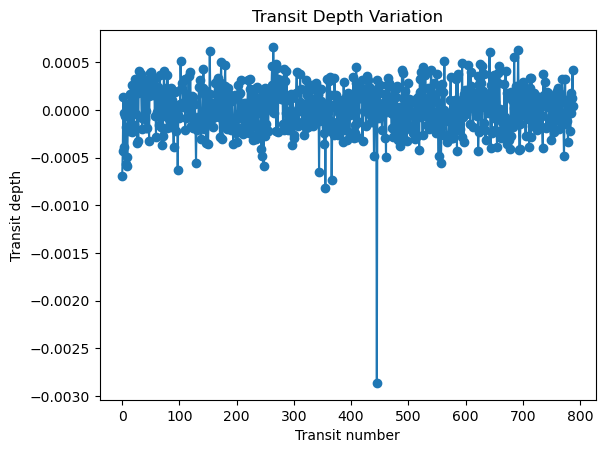

In [32]:
# Plot depth variation for the multiple transits
# Split the light curve into individual transits
num_transits = int((time[-1] - time[0]) / best_period)
transit_depths = []

for n in range(num_transits):
    t0 = transit_centers + n*best_period
    mask_transit = (time > t0 - duration/2) & (time < t0 + duration/2)
    if np.any(mask_transit):
        flux_transit = flux[mask_transit]
        depth_n = 1 - np.min(flux_transit)
        transit_depths.append(depth_n)

# Plot variation
plt.plot(range(len(transit_depths)), transit_depths, marker='o')
plt.xlabel("Transit number")
plt.ylabel("Transit depth")
plt.title("Transit Depth Variation")
plt.show()